In [37]:
# !pip install pycaret


## Introduction

ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

## Importing Data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp

In [39]:
df = pd.read_csv("data.csv")

## Data Analysis

In [40]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [41]:
df.describe().round(3)

,Y,X1,X2,X3,X4,X5,X6
count,126.000,126.000,126.000,126.000,126.000,126.000,126.000
mean,0.548,4.333,2.532,3.310,3.746,3.651,4.254
std,0.500,0.800,1.115,1.023,0.876,1.148,0.809
min,0.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,0.000,4.000,2.000,3.000,3.000,3.000,4.000
50%,1.000,5.000,3.000,3.000,4.000,4.000,4.000
75%,1.000,5.000,3.000,4.000,4.000,4.000,5.000
max,1.000,5.000,5.000,5.000,5.000,5.000,5.000


In [42]:
df.profile_report()

As we can see that For attributes (X1 to X6) minimum values is 1 and maximum value is 5. There is no ambiguity in data. Mean for question X1 (my order was delivered on time) is 4.33 which is significantly high and shows that majority customer get delivery on time. 

Similarly for feature X6( the app makes ordering easy for me), average user rating is 4.25 which shows that most user finds app user friendly. 

Other attirbutes varies between 1 to 6 with median being mostly 3 or 4.


In [43]:
df.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

We did not find any missing value and hence there is no imputation needed. 

Y
1    69
0    57
Name: Y, dtype: int64

X1
5    65
4    40
3    20
1     1
Name: X1, dtype: int64

X2
3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64

X3
3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64

X4
4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64

X5
4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64

X6
5    57
4    47
3    20
2     1
1     1
Name: X6, dtype: int64



# Data Visulization

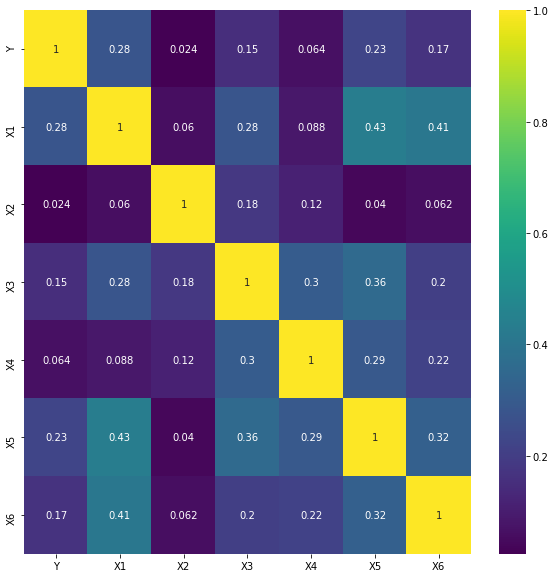

In [44]:
plt.subplots(figsize = (10,10))

sns.heatmap(df.corr().abs().round(3), cmap = 'viridis', annot=True)

As we can see that most features are not correlateed. Also X2 and X4 are least correlated with outcome. 

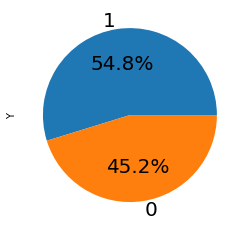

In [45]:
df['Y'].value_counts(normalize = True).plot(kind='pie', autopct='%1.1f%%', fontsize = 20,)

We can see that dataset is slightly unbalanced.However, we can still uses accuracy as evaluation metric. 

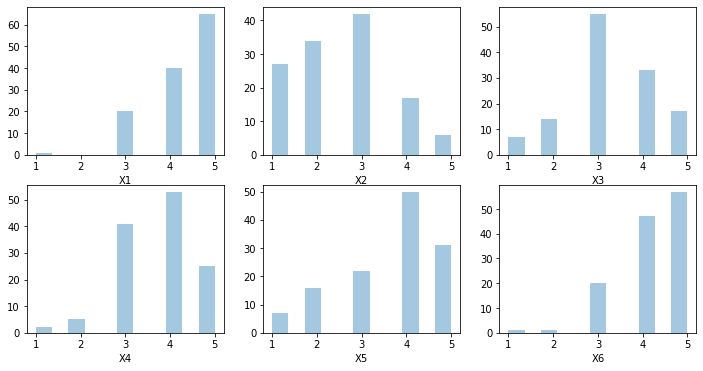

In [46]:
fig,axs = plt.subplots(2,3, figsize = (12,6))

for index in range(6):
#     print(column)
    sns.distplot(df.iloc[:,index+1], ax = axs[index//3, index%3], kde = False)
    

In [47]:
df.skew()


Y    -0.193659
X1   -1.058468
X2    0.271000
X3   -0.199536
X4   -0.422240
X5   -0.699999
X6   -0.957590
dtype: float64

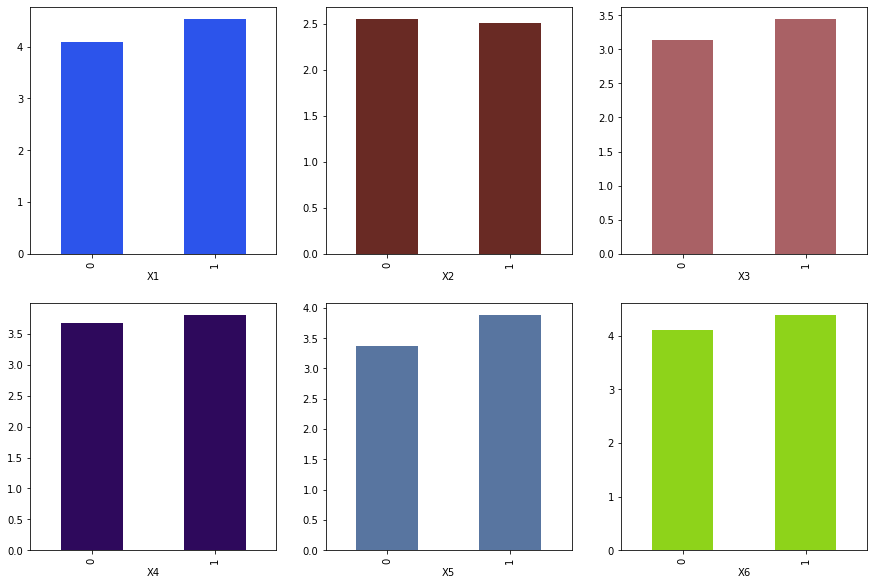

In [78]:
fig,axs = plt.subplots(2,3, figsize = (15,10))
for i,c in enumerate(df.columns[1:]):
#     print("For feature ", c)
#     print(df.groupby('Y')[c].mean().round(2))
    df.groupby('Y')[c].mean().round(2).plot(kind ='bar', ax = axs[i//3,i%3], color = np.random.rand(3,))
    axs[i//3,i%3].set_xlabel(c)
#     print("")

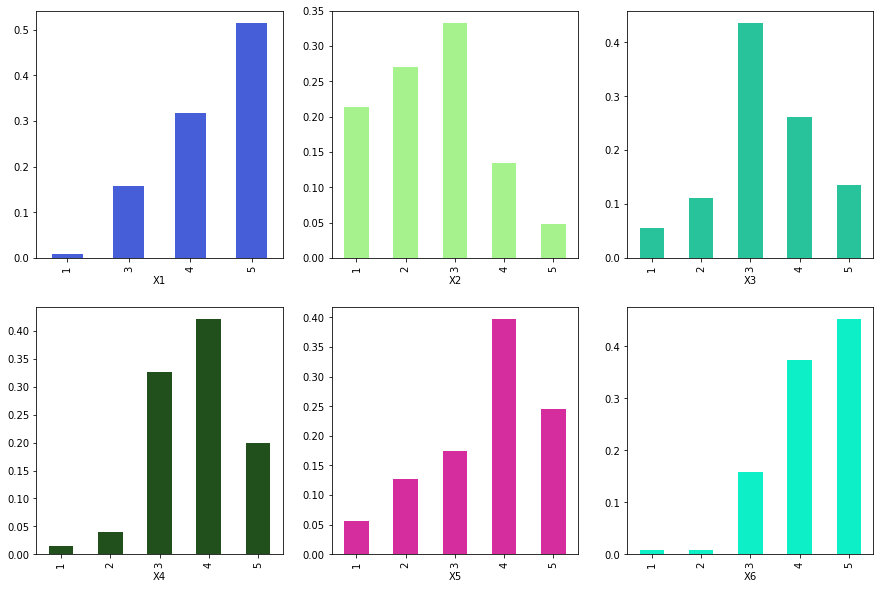

In [80]:
fig,axs = plt.subplots(2,3, figsize = (15,10))
for i,c in enumerate(df.columns[1:]):
#    print(c)
#    print( df[c].value_counts())
    df[c].value_counts(normalize=True).sort_index().plot(kind = 'bar', ax = axs[i//3,i%3], color = np.random.rand(3,))
    axs[i//3,i%3].set_xlabel(c)
#    print("")

## Feature Engineering

We can see that X1 is highly skewed where as X5 and X6 are moderately skewed.

In [81]:
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.3)

In [84]:
X_train.head()

,X1,X2,X3,X4,X5,X6
30,5,3,3,3,5,3
18,5,1,2,4,4,5
2,5,3,3,3,3,5
41,4,2,4,3,2,4
65,4,1,3,4,4,4


In [85]:
from scipy.stats import boxcox

fitted_data1, fitted_lambda1 = stats.boxcox(X_train['X1'])
fitted_data2, fitted_lambda2 = stats.boxcox(X_train['X5'])
fitted_data3, fitted_lambda3 = stats.boxcox(X_train['X6'])

test_data1 = stats.boxcox(X_test['X1'], fitted_lambda1)
test_data2 = stats.boxcox(X_test['X5'], fitted_lambda1)
test_data3 = stats.boxcox(X_test['X6'], fitted_lambda1)

In [86]:
X_train['X1'] = fitted_data1
X_train['X5'] = fitted_data2
X_train['X6'] = fitted_data3

X_test['X1'] = test_data1
X_test['X5'] = test_data2
X_test['X6'] = test_data3

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [90]:
display(X_train.head(20))
display(X_test.head(20))

,X1,X2,X3,X4,X5,X6
30,38.835760,3,3,3,8.755591,6.178724
18,38.835760,1,2,4,5.769615,24.064937
2,38.835760,3,3,3,3.283284,24.064937
41,19.936519,2,4,3,1.338125,13.381349
65,19.936519,1,3,4,5.769615,13.381349
100,38.835760,2,2,4,8.755591,24.064937
7,38.835760,4,4,4,5.769615,24.064937
6,8.334863,1,2,2,0.000000,6.178724
29,38.835760,3,3,3,8.755591,6.178724
94,8.334863,1,3,2,0.000000,1.924535


,X1,X2,X3,X4,X5,X6
26,8.334863,3,3,5,38.835760,38.835760
43,19.936519,3,3,4,2.282140,19.936519
5,38.835760,5,3,5,38.835760,38.835760
12,38.835760,2,4,5,38.835760,38.835760
125,38.835760,3,2,5,38.835760,38.835760
14,19.936519,1,3,3,19.936519,8.334863
118,19.936519,3,3,4,19.936519,19.936519
103,19.936519,3,4,4,8.334863,19.936519
21,19.936519,3,5,5,38.835760,19.936519
66,8.334863,3,3,5,19.936519,8.334863


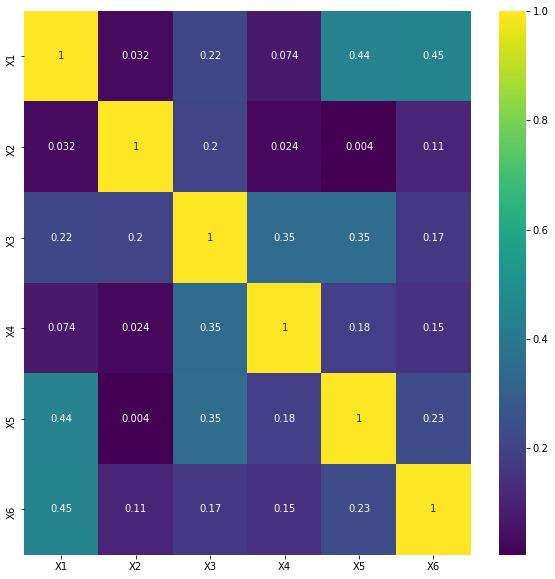

In [89]:
plt.subplots(figsize = (10,10))

sns.heatmap(X_train.corr().abs().round(3), cmap = 'viridis', annot=True)

In [92]:
X_train = X_train.drop(['X2', 'X4'], axis=1)
X_test = X_test.drop(['X2', 'X4'], axis =1)



In [107]:
X_train = pd.get_dummies(X_train, drop_first=False, columns= [ 'X1', 'X3', 'X5', 'X6'])
X_test = pd.get_dummies(X_test, drop_first= False)

In [108]:
X_train.dtypes

X1_8.334863197510193     uint8
X1_19.936519013750704    uint8
X1_38.83575985109366     uint8
X3_1                     uint8
X3_2                     uint8
X3_3                     uint8
X3_4                     uint8
X3_5                     uint8
X5_0.0                   uint8
X5_1.3381247693474116    uint8
X5_3.2832843660779574    uint8
X5_5.769614603433205     uint8
X5_8.755590784954439     uint8
X6_0.0                   uint8
X6_1.9245350002147497    uint8
X6_6.178724396543212     uint8
X6_13.381348808105805    uint8
X6_24.06493653406283     uint8
dtype: object

In [152]:
def genetate_train_test(df):
    X = df.drop('Y', axis=1)
    y = df['Y']
    # Without stratifying, bootstrap
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)
    
    fitted_data1, fitted_lambda1 = stats.boxcox(X_train['X1'])
    fitted_data2, fitted_lambda2 = stats.boxcox(X_train['X5'])
    fitted_data3, fitted_lambda3 = stats.boxcox(X_train['X6'])

    test_data1 = stats.boxcox(X_test['X1'], fitted_lambda1)
    test_data2 = stats.boxcox(X_test['X5'], fitted_lambda1)
    test_data3 = stats.boxcox(X_test['X6'], fitted_lambda1)
    
    X_train['X1'] = fitted_data1
    X_train['X5'] = fitted_data2
    X_train['X6'] = fitted_data3

    X_test['X1'] = test_data1
    X_test['X5'] = test_data2
    X_test['X6'] = test_data3
    
    X_train = X_train.drop(['X2', 'X4'], axis=1)
    X_test = X_test.drop(['X2', 'X4'], axis =1)
    
#     X_train = pd.get_dummies(X_train, drop_first=False, columns= [ 'X1', 'X3', 'X5', 'X6'])
#     X_test = pd.get_dummies(X_test, drop_first= False, columns= [ 'X1', 'X3', 'X5', 'X6'])
    
    return X_train, X_test, y_train, y_test
    
    

In [153]:
X_train1, X_test1, y_train1, y_test1 = genetate_train_test(df)
X_train2, X_test2, y_train2, y_test2 = genetate_train_test(df)
X_train3, X_test3, y_train3, y_test3 = genetate_train_test(df)

In [128]:
X_train1.head()

,X1,X3,X5,X6
119,51.465122,1,8.923219,0.000000
83,51.465122,2,5.861422,17.790887
16,51.465122,4,5.861422,33.876819
39,25.214435,3,1.347397,17.790887
124,25.214435,3,5.861422,33.876819


In [129]:
X_train2.head()

,X1,X3,X5,X6
99,11.013060,2,5.666971,17.011193
26,11.013060,3,8.568827,32.102940
91,60.560938,3,8.568827,32.102940
77,60.560938,3,8.568827,32.102940
71,28.883907,5,0.000000,7.398560


## Pycaret - Auto Model Tuning and Ensmemble models

We are going to bootstrap our dataset. In order to do bootstrap we will create 3 seperate train and test set from same data frame. It is possible that some of samples are repeated in each set while some samples are unique. This way we will get top model for each set.


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score
from time import time
from datetime import datetime
import json

In [154]:
def converter_df(train_independent, train_dependent):
    df = train_independent.copy()
    df['dependant'] = train_dependent
    return df

In [155]:
df1 = converter_df(train_independent = X_train1, train_dependent = y_train1)
df2 = converter_df(train_independent = X_train2, train_dependent = y_train2)
df3 = converter_df(train_independent = X_train3, train_dependent = y_train3)

### With First Dataset
We will use pycaret find top models. We will also do parameter tuning using pycaret. We will select sevral models from it.

In [161]:
from pycaret.classification import *


exp_clf101 = setup(data = df1, target = df1.columns[-1], session_id=123, train_size = 0.7)

,Description,Value
0,session_id,123
1,Target,dependant
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(88, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comapre Classification Models

In [162]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7524,0.7215,0.8583,0.7667,0.7990,0.4553,0.4800,6.6690
knn,K Neighbors Classifier,0.7381,0.6715,0.9083,0.7383,0.7999,0.4090,0.4588,0.1200
lightgbm,Light Gradient Boosting Machine,0.7095,0.6750,0.7250,0.7800,0.7406,0.3988,0.4170,0.0670
dt,Decision Tree Classifier,0.7024,0.7278,0.7500,0.7533,0.7387,0.3781,0.3837,0.0220
gbc,Gradient Boosting Classifier,0.7024,0.7243,0.7667,0.7250,0.7295,0.3686,0.3843,0.0570
xgboost,Extreme Gradient Boosting,0.6738,0.6340,0.7500,0.7233,0.7272,0.3075,0.3221,0.2310
rf,Random Forest Classifier,0.6690,0.7549,0.7500,0.7150,0.7156,0.2877,0.2912,0.4860
et,Extra Trees Classifier,0.6690,0.7472,0.7750,0.6933,0.7063,0.3067,0.3234,0.4670
lr,Logistic Regression,0.6595,0.6938,0.7250,0.7183,0.7100,0.2548,0.2598,0.0380
ridge,Ridge Classifier,0.6429,0.0000,0.7250,0.6933,0.6957,0.2214,0.2305,0.0200


#### Hyper Parameter tuning Machine Learning model

In [138]:
lgbm = create_model('lightgbm', fold=10)
tuned_lgbm1 = tune_model(lgbm, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4286,0.4167,0.5000,0.5000,0.5000,-0.1667,-0.1667
1,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
2,0.8333,0.8333,1.0000,0.7500,0.8571,0.6667,0.7071
3,0.8333,0.8333,0.6667,1.0000,0.8000,0.6667,0.7071
4,0.8333,0.8333,0.6667,1.0000,0.8000,0.6667,0.7071
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.5000,0.5000,0.5000,0.6667,0.5714,0.0000,0.0000
7,0.5000,0.5000,0.5000,0.6667,0.5714,0.0000,0.0000
8,0.8333,0.7500,1.0000,0.8000,0.8889,0.5714,0.6325
9,0.6667,0.6250,0.7500,0.7500,0.7500,0.2500,0.2500


In [140]:
catboost = create_model('catboost', fold=10)
tuned_catboost1 = tune_model(catboost, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.7500,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
2,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.5000,0.5625,0.7500,0.6000,0.6667,-0.2857,-0.3162
7,0.6667,0.4375,0.7500,0.7500,0.7500,0.2500,0.2500
8,0.6667,0.3750,1.0000,0.6667,0.8000,0.0000,0.0000
9,0.8333,0.8125,1.0000,0.8000,0.8889,0.5714,0.6325


In [145]:
dt = create_model('dt', fold=10)
tuned_dt1 = tune_model(dt, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5714,0.4167,1.0000,0.5714,0.7273,0.0000,0.0000
1,0.6667,0.7222,1.0000,0.6000,0.7500,0.3333,0.4472
2,0.8333,0.8333,1.0000,0.7500,0.8571,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
7,0.6667,0.4375,1.0000,0.6667,0.8000,0.0000,0.0000
8,0.6667,0.7500,1.0000,0.6667,0.8000,0.0000,0.0000
9,0.6667,0.6250,1.0000,0.6667,0.8000,0.0000,0.0000


In [142]:
knn = create_model('knn', fold=10)
tuned_knn1 = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,10,1)}, fold=10, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.4167,1.0000,0.6667,0.8000,0.3636,0.4714
1,0.5000,0.6667,0.6667,0.5000,0.5714,0.0000,0.0000
2,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071
3,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
4,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8333,0.7500,1.0000,0.8000,0.8889,0.5714,0.6325
7,0.6667,0.5625,0.7500,0.7500,0.7500,0.2500,0.2500
8,0.6667,0.0625,1.0000,0.6667,0.8000,0.0000,0.0000
9,0.8333,0.7500,1.0000,0.8000,0.8889,0.5714,0.6325


In [143]:
rf = create_model('rf', fold=10)
tuned_rf1 = tune_model(rf, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2857,0.5000,0.5000,0.4000,0.4444,-0.5217,-0.5477
1,0.5000,0.5556,0.6667,0.5000,0.5714,0.0000,0.0000
2,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.6667,0.4375,0.7500,0.7500,0.7500,0.2500,0.2500
7,0.6667,0.5625,0.7500,0.7500,0.7500,0.2500,0.2500
8,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
9,0.6667,0.6875,1.0000,0.6667,0.8000,0.0000,0.0000


In [160]:
df2.head()

,X1,X3,X5,X6,dependant
99,11.013060,2,5.666971,17.011193,0
26,11.013060,3,8.568827,32.102940,1
91,60.560938,3,8.568827,32.102940,1
77,60.560938,3,8.568827,32.102940,1
71,28.883907,5,0.000000,7.398560,0


### With Second Dataset

In [164]:
from pycaret.classification import *


exp_clf102 = setup(data = df2, target = df2.columns[-1], session_id=223, train_size = 0.7)

,Description,Value
0,session_id,223
1,Target,dependant
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(88, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comapre Classification Models

In [165]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5929,0.5917,0.6417,0.6833,0.6312,0.1667,0.1861,0.0710
lightgbm,Light Gradient Boosting Machine,0.5714,0.6847,0.5917,0.6317,0.5888,0.1347,0.1481,0.0800
xgboost,Extreme Gradient Boosting,0.5595,0.6167,0.6167,0.6417,0.5912,0.1067,0.1321,0.2360
lr,Logistic Regression,0.5548,0.5444,0.6250,0.5833,0.5979,0.0947,0.1014,0.0360
ada,Ada Boost Classifier,0.5405,0.5694,0.5917,0.5667,0.5705,0.0587,0.0477,0.0750
knn,K Neighbors Classifier,0.5381,0.6500,0.6500,0.5833,0.5912,0.0817,0.0917,0.1210
ridge,Ridge Classifier,0.5381,0.0000,0.6250,0.5667,0.5883,0.0614,0.0681,0.0200
nb,Naive Bayes,0.5286,0.5472,0.5583,0.5550,0.5381,0.0667,0.0449,0.0210
rf,Random Forest Classifier,0.5262,0.5292,0.5500,0.6233,0.5543,0.0400,0.0500,0.5060
dt,Decision Tree Classifier,0.5238,0.6083,0.4333,0.6067,0.4638,0.0571,0.0763,0.0230


#### Hyper Parameter tuning Machine Learning model

In [171]:
gbc = create_model('gbc', fold=10)
tuned_gbc2 = tune_model(gbc, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.7500,0.5000,1.0000,0.6667,0.4615,0.5477
1,0.6667,0.6875,0.7500,0.7500,0.7500,0.2500,0.2500
2,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
3,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
4,0.5000,0.3889,0.3333,0.5000,0.4000,0.0000,0.0000
5,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
6,0.6667,0.6667,0.3333,1.0000,0.5000,0.3333,0.4472
7,0.5000,0.5000,0.3333,0.5000,0.4000,0.0000,0.0000
8,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
9,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [172]:
dt = create_model('dt', fold=10)
tuned_dt2 = tune_model(dt, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8750,0.7500,1.0000,0.8571,0.7200,0.7500
1,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
2,0.8333,0.8750,0.7500,1.0000,0.8571,0.6667,0.7071
3,0.5000,0.5000,0.3333,0.5000,0.4000,0.0000,0.0000
4,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.5000,0.5000,0.3333,0.5000,0.4000,0.0000,0.0000
6,0.3333,0.3333,0.3333,0.3333,0.3333,-0.3333,-0.3333
7,0.5000,0.5000,0.6667,0.5000,0.5714,0.0000,0.0000
8,0.8333,0.8333,0.6667,1.0000,0.8000,0.6667,0.7071
9,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333


In [173]:
knn = create_model('knn', fold=10)
tuned_knn2= tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,10,1)}, fold=10, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9167,1.0000,0.8000,0.8889,0.6957,0.7303
1,0.8333,0.8125,0.7500,1.0000,0.8571,0.6667,0.7071
2,0.1667,0.2500,0.2500,0.3333,0.2857,-0.6667,-0.7071
3,0.6667,0.6667,0.3333,1.0000,0.5000,0.3333,0.4472
4,0.6667,0.8333,1.0000,0.6000,0.7500,0.3333,0.4472
5,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.6667,0.6111,0.6667,0.6667,0.6667,0.3333,0.3333
7,0.5000,0.4444,0.3333,0.5000,0.4000,0.0000,0.0000
8,0.3333,0.4444,0.3333,0.3333,0.3333,-0.3333,-0.3333
9,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472


In [174]:
rf = create_model('rf', fold=10)
tuned_rf2 = tune_model(rf, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,1.0000,1.0000,0.6667,0.8000,0.3636,0.4714
1,0.6667,0.6250,0.5000,1.0000,0.6667,0.4000,0.5000
2,0.6667,0.5000,0.7500,0.7500,0.7500,0.2500,0.2500
3,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
4,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071
6,0.3333,0.2222,0.3333,0.3333,0.3333,-0.3333,-0.3333
7,0.3333,0.0000,0.6667,0.4000,0.5000,-0.3333,-0.4472
8,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
9,0.3333,0.5556,0.6667,0.4000,0.5000,-0.3333,-0.4472


In [175]:
lr = create_model('lr', fold=10)
tuned_lr2 = tune_model(lr, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500
1,0.5000,0.7500,0.5000,0.6667,0.5714,0.0000,0.0000
2,0.8333,0.7500,0.7500,1.0000,0.8571,0.6667,0.7071
3,0.5000,0.6667,0.3333,0.5000,0.4000,0.0000,0.0000
4,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
6,0.3333,0.5556,0.3333,0.3333,0.3333,-0.3333,-0.3333
7,0.5000,0.3333,0.6667,0.5000,0.5714,0.0000,0.0000
8,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
9,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333


### With Third Dataset

In [176]:
from pycaret.classification import *

exp_clf103 = setup(data = df3, target = df3.columns[-1], session_id=323, train_size = 0.7)

,Description,Value
0,session_id,323
1,Target,dependant
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(88, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comapre Classification Models

In [177]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8214,0.7931,0.9000,0.8450,0.8516,0.6293,0.6750,0.2250
knn,K Neighbors Classifier,0.7238,0.7438,0.8500,0.7233,0.7665,0.4112,0.4631,0.1280
catboost,CatBoost Classifier,0.7071,0.6917,0.8583,0.7067,0.7667,0.3791,0.4021,6.4720
gbc,Gradient Boosting Classifier,0.7048,0.6708,0.8333,0.7300,0.7677,0.3571,0.3632,0.0610
dt,Decision Tree Classifier,0.6905,0.6201,0.8083,0.7255,0.7501,0.3500,0.3695,0.0220
rf,Random Forest Classifier,0.6738,0.6917,0.8333,0.6967,0.7484,0.3029,0.2993,0.4820
ada,Ada Boost Classifier,0.6548,0.5861,0.7250,0.7350,0.6903,0.2988,0.3545,0.0920
et,Extra Trees Classifier,0.6071,0.6736,0.7583,0.6650,0.6907,0.1660,0.1634,0.4700
nb,Naive Bayes,0.5881,0.5944,0.6000,0.6567,0.5948,0.1666,0.2014,0.0200
lr,Logistic Regression,0.5071,0.5708,0.6583,0.5417,0.5729,-0.0513,-0.0596,0.2820


#### Hyper Parameter tuning Machine Learning model

In [181]:
xgboost = create_model('xgboost', fold=10)
tuned_xgboost3 = tune_model(xgboost, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.6667,0.7500,0.7500,0.7500,0.4167,0.4167
1,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
2,0.8333,0.5000,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.8333,0.8750,1.0000,0.8000,0.8889,0.5714,0.6325
4,0.6667,0.7500,0.7500,0.7500,0.7500,0.2500,0.2500
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.6667,0.7778,1.0000,0.6000,0.7500,0.3333,0.4472
8,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
9,0.6667,0.7778,1.0000,0.6000,0.7500,0.3333,0.4472


In [178]:
gbc = create_model('gbc', fold=10)
tuned_gbc3 = tune_model(gbc, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.7500,0.7500,0.7500,0.7500,0.4167,0.4167
1,0.8333,1.0000,1.0000,0.8000,0.8889,0.5714,0.6325
2,0.8333,0.5000,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
4,0.8333,0.7500,0.7500,1.0000,0.8571,0.6667,0.7071
5,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.6667,0.5556,1.0000,0.6000,0.7500,0.3333,0.4472
8,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071
9,0.6667,0.5556,1.0000,0.6000,0.7500,0.3333,0.4472


In [179]:
dt = create_model('dt', fold=10)
tuned_dt3 = tune_model(dt, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5714,0.5417,0.5000,0.6667,0.5714,0.1600,0.1667
1,0.6667,0.6875,0.7500,0.7500,0.7500,0.2500,0.2500
2,0.8333,0.8750,1.0000,0.8000,0.8889,0.5714,0.6325
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.6250,0.7500,0.7500,0.7500,0.2500,0.2500
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071
7,0.6667,0.5000,1.0000,0.6000,0.7500,0.3333,0.4472
8,0.5000,0.3889,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.6667,0.5556,1.0000,0.6000,0.7500,0.3333,0.4472


In [180]:
knn = create_model('knn', fold=10)
tuned_knn3= tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,10,1)}, fold=10, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.6667,0.7500,0.7500,0.7500,0.4167,0.4167
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8333,0.5625,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.8333,0.5625,1.0000,0.8000,0.8889,0.5714,0.6325
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8333,0.7222,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.6667,0.6111,1.0000,0.6000,0.7500,0.3333,0.4472
8,0.5000,0.4444,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.6667,0.5556,1.0000,0.6000,0.7500,0.3333,0.4472


In [182]:
rf = create_model('rf', fold=10)
tuned_rf3 = tune_model(rf, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5714,0.6667,0.5000,0.6667,0.5714,0.1600,0.1667
1,0.8333,0.6250,1.0000,0.8000,0.8889,0.5714,0.6325
2,0.8333,0.5625,1.0000,0.8000,0.8889,0.5714,0.6325
3,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
4,0.6667,0.5000,0.7500,0.7500,0.7500,0.2500,0.2500
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071
7,0.6667,0.5000,1.0000,0.6000,0.7500,0.3333,0.4472
8,0.5000,0.4444,0.6667,0.5000,0.5714,0.0000,0.0000
9,0.6667,0.5556,1.0000,0.6000,0.7500,0.3333,0.4472


In [183]:
lr = create_model('lr', fold=10)
tuned_lr3 = tune_model(lr, fold = 10, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5714,0.7500,0.2500,1.0000,0.4000,0.2222,0.3536
1,0.6667,0.5000,0.7500,0.7500,0.7500,0.2500,0.2500
2,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
3,0.5000,0.3750,0.5000,0.6667,0.5714,0.0000,0.0000
4,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
5,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
6,0.3333,0.2222,0.0000,0.0000,0.0000,-0.3333,-0.4472
7,0.5000,0.7778,0.6667,0.5000,0.5714,0.0000,0.0000
8,0.3333,0.4444,0.3333,0.3333,0.3333,-0.3333,-0.3333
9,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333


## Ensemble Models
Now from pycaret we have created several classification models. Each models were giving good results. We will further use weighted ensemble models to improve accuracy. We will use sequential backward selection to try various combination of weights, models and features to identify what gives us best accuracy.

Lets gather all best models

In [186]:
best_models = [tuned_dt1, tuned_knn1, tuned_gbc2, tuned_gbc3, tuned_dt3, tuned_knn3, tuned_rf3]

best_models_names = ['tuned_dt1', 'tuned_knn1', 'tuned_gbc2', 'tuned_gbc3', 'tuned_dt3', 'tuned_knn3', 'tuned_rf3']

In [189]:
for model in best_models:
    print(model)
    print("")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=223, splitter='best')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='uniform')

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.408, loss='deviance', max_depth=11,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0002,
                           min_impurity_split=None, min_samples_leaf=2,
                           min_

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from itertools import combinations, product
from tqdm import tqdm
from sklearn.metrics import accuracy_score


def weighted_voting(estimators, estimator_names, X_train, y_train, X_test, y_test):

    weights = np.round([np.arange(0.1,1,0.1)]*(len(estimators)),1)
    df_weights = pd.DataFrame(columns=['n_models', 'models', 'weights', 'train_accuracy', 'test_accuracy'])
    for weight in tqdm(product(*weights)):
        weight_sum = np.round(np.sum(weight),1)
        if weight_sum == 1:
            clf_voting = VotingClassifier(estimators = list(zip(estimator_names, estimators)),
                                          voting = 'soft', weights= list(weight))
    
            train_score = cross_val_score(clf_voting, X_train, y_train, scoring='accuracy', cv=5)
            clf_voting.fit(X_train, y_train)
#             y_pred_train =  clf_voting.predict(X_train)
            y_pred = clf_voting.predict(X_test)
#             print(score)
#             train_score = accuracy_score(y_train, y_pred_train)
            test_score = accuracy_score(y_test, y_pred)
            df_weights.loc[len(df_weights)] = [len(estimators),
                                               estimator_names,
                                               list(weight),
                                               np.round(np.mean(train_score),4),
                                               np.round(np.mean(test_score),4)]
    return df_weights

def ensemble_SBS(models, models_name, X_train, y_train, X_test, y_test):
    dim = len(models)
    indices = tuple(range(dim))
    subset = [indices]
    model_list = [models_name]
    print("number of model combination ... ---> ", dim)
    df_model_sub = weighted_voting(models, models_name, X_train, y_train, X_test, y_test)
    df = df_model_sub.copy()

    while dim > 3:

        print("number of model combination ... ---> ", dim-1)
        temp_accuracy_score = []
        temp_subset = []
        temp_model_names = []
        temp_weights = []
        for p in combinations(indices, r = dim-1):
            selected = [models[i] for i in p]
            selected_names = [models_name[i] for i in p]
            df_model_sub = weighted_voting(selected, selected_names, X_train, y_train, X_test, y_test)
            df = df.append(df_model_sub)

        model_subset = df[df['n_models'] == dim-1]
        best_model_accuracy = model_subset['train_accuracy'].max()
        best_models_names = model_subset[model_subset['train_accuracy'] == best_model_accuracy]['models']
        dim-=1

    return df
    
    
def sbs_features(models, models_name, X_train, y_train, X_test, y_test, k_features)   :
    dim_features = X_train.shape[1]
    feature_indices = tuple(range(dim_features))
    
    print("number of features ... ---> ", dim_features)
    print("")
    print("Selected Indices or features --->", feature_indices)

    df_sub = ensemble_SBS(models, models_name, X_train, y_train, X_test, y_test)
    df_sub['features'] = " ".join(map(str,feature_indices))
    df_sub['n_features'] = dim_features
    display(df_sub[df_sub['train_accuracy'] == df_sub['train_accuracy'].max()])


    df = df_sub.copy()
    
    while dim_features > k_features:
        print("*"*20)
        print("number of features ... ---> ", dim_features-1)
        for p in combinations(feature_indices, r = dim_features-1):
            print("")
            print("Selected Indices or features --->", p)
            df_sub = ensemble_SBS(models, models_name, X_train.iloc[:,list(p)], y_train, X_test.iloc[:,list(p)], y_test)
            df_sub['features'] = " ".join(map(str,p))
            df_sub['n_features'] = dim_features-1
            df = df.append(df_sub)        
        
        feature_subset = df[df['n_features'] == dim_features-1]
        best_accuracy = feature_subset['train_accuracy'].max()
        display(feature_subset[feature_subset['train_accuracy'] == best_accuracy])

        best_indices = feature_subset[feature_subset['train_accuracy'] == best_accuracy]['features'].values[0]
        print("Best Indices so far ", best_indices)
        best_indices = map(int, best_indices.split(" "))
        feature_indices = tuple(best_indices)        
        dim_features-=1               
    return df.reset_index(drop=True)
            
        
        
    
    
    

In [264]:
X_train, X_test, y_train, y_test = genetate_train_test(df)

In [265]:


score_df = sbs_features(best_models, best_models_names, X_train, y_train, X_test, y_test, 2)



0it [00:00, ?it/s]

number of features ... --->  4

Selected Indices or features ---> (0, 1, 2, 3)
number of model combination ... --->  7


4782969it [06:11, 12875.57it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:54, 2268.86it/s] 
531441it [07:25, 1191.83it/s] 
531441it [07:18, 1213.14it/s] 
531441it [06:16, 1413.07it/s] 
531441it [05:31, 1602.00it/s] 
531441it [07:03, 1254.82it/s] 
531441it [07:19, 1208.80it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:43, 264.76it/s]
59049it [03:43, 263.82it/s]
59049it [06:52, 143.24it/s]
59049it [02:35, 379.69it/s]
59049it [05:52, 167.31it/s]
59049it [06:01, 163.48it/s]
59049it [01:55, 509.89it/s]
59049it [05:06, 192.59it/s]
59049it [05:39, 174.04it/s]
59049it [04:14, 232.16it/s]
59049it [03:26, 286.30it/s]
59049it [06:41, 146.92it/s]
59049it [06:52, 143.30it/s]
59049it [05:51, 167.78it/s]
59049it [05:05, 193.07it/s]
59049it [03:41, 266.49it/s]
59049it [07:09, 137.35it/s]
59049it [07:08, 137.84it/s]
59049it [06:03, 162.66it/s]
59049it [05:59, 164.44it/s]
59049it [07:42, 127.66it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:35, 42.12it/s]
6561it [01:39, 65.78it/s]
6561it [01:57, 56.03it/s]
6561it [04:13, 25.86it/s]
6561it [01:04, 101.83it/s]
6561it [01:48, 60.32it/s]
6561it [04:30, 24.23it/s]
6561it [00:36, 178.83it/s]
6561it [03:27, 31.58it/s]
6561it [03:40, 29.69it/s]
6561it [02:55, 37.49it/s]
6561it [02:52, 38.09it/s]
6561it [04:25, 24.74it/s]
6561it [01:30, 72.45it/s]
6561it [03:37, 30.15it/s]
6561it [03:48, 28.68it/s]
6561it [01:04, 101.58it/s]
6561it [03:31, 31.02it/s]
6561it [03:21, 32.60it/s]
6561it [02:36, 41.87it/s]
6561it [02:15, 48.48it/s]
6561it [02:28, 44.23it/s]
6561it [04:32, 24.08it/s]
6561it [01:41, 64.80it/s]
6561it [03:48, 28.66it/s]
6561it [04:00, 27.34it/s]
6561it [01:14, 87.60it/s]
6561it [03:25, 31.98it/s]
6561it [03:31, 31.05it/s]
6561it [02:46, 39.34it/s]
6561it [02:14, 48.69it/s]
6561it [04:42, 23.22it/s]
6561it [04:34, 23.91it/s]
6561it [03:48, 28.71it/s]
6561it [03:22, 32.38it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:37, 19.35it/s]
729it [00:26, 27.07it/s]
729it [00:07, 97.84it/s]
729it [00:12, 60.49it/s]
729it [01:07, 10.81it/s]
729it [00:52, 13.95it/s]
729it [00:33, 21.97it/s]
729it [00:40, 18.00it/s]
729it [01:32,  7.88it/s]
729it [00:21, 33.67it/s]
729it [00:26, 27.34it/s]
729it [01:21,  8.99it/s]
729it [00:07, 97.52it/s] 
729it [01:02, 11.68it/s]
729it [01:06, 11.02it/s]
729it [00:57, 12.71it/s]
729it [00:38, 19.00it/s]
729it [00:42, 17.35it/s]
729it [01:37,  7.46it/s]
729it [00:27, 26.91it/s]
729it [00:31, 23.17it/s]
729it [01:24,  8.59it/s]
729it [00:12, 60.28it/s]
729it [01:07, 10.77it/s]
729it [01:11, 10.27it/s]
729it [00:53, 13.55it/s]
729it [00:57, 12.67it/s]
729it [01:51,  6.53it/s]
729it [00:38, 19.13it/s]
729it [01:48,  6.71it/s]
729it [01:37,  7.47it/s]
729it [00:26, 27.57it/s]
729it [01:21,  8.97it/s]
729it [01:26,  8.44it/s]
729it [01:07, 10.78it/s]


,n_models,models,weights,train_accuracy,test_accuracy,features,n_features
40,4,"[tuned_dt1, tuned_knn1, tuned_gbc3, tuned_knn3]","[0.2, 0.3, 0.2, 0.3]",0.7268,0.6579,0 1 2 3,4
31,3,"[tuned_knn1, tuned_gbc3, tuned_knn3]","[0.6, 0.2, 0.2]",0.7268,0.6579,0 1 2 3,4
9,3,"[tuned_gbc2, tuned_gbc3, tuned_knn3]","[0.2, 0.2, 0.6]",0.7268,0.6316,0 1 2 3,4
10,3,"[tuned_gbc2, tuned_gbc3, tuned_knn3]","[0.2, 0.3, 0.5]",0.7268,0.5000,0 1 2 3,4


0it [00:00, ?it/s]

********************
number of features ... --->  3

Selected Indices or features ---> (0, 1, 2)
number of model combination ... --->  7


4782969it [06:06, 13058.32it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:51, 2291.75it/s] 
531441it [07:17, 1215.39it/s] 
531441it [07:36, 1164.79it/s] 
531441it [06:24, 1382.77it/s] 
531441it [06:19, 1399.19it/s] 
531441it [07:46, 1138.57it/s] 
531441it [07:21, 1205.04it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:26, 285.37it/s]
59049it [03:42, 265.83it/s]
59049it [06:54, 142.45it/s]
59049it [02:32, 386.86it/s]
59049it [05:58, 164.88it/s]
59049it [05:59, 164.14it/s]
59049it [01:57, 501.17it/s]
59049it [05:06, 192.51it/s]
59049it [05:25, 181.40it/s]
59049it [04:12, 233.85it/s]
59049it [03:24, 288.68it/s]
59049it [06:39, 147.99it/s]
59049it [07:05, 138.83it/s]
59049it [05:43, 171.81it/s]
59049it [05:10, 190.07it/s]
59049it [03:42, 265.80it/s]
59049it [06:52, 143.12it/s]
59049it [07:08, 137.94it/s]
59049it [05:58, 164.67it/s]
59049it [05:39, 174.11it/s]
59049it [06:51, 143.51it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:16, 48.07it/s]
6561it [01:28, 73.76it/s]
6561it [01:39, 65.84it/s]
6561it [03:46, 28.94it/s]
6561it [01:05, 100.64it/s]
6561it [01:15, 86.71it/s]
6561it [03:23, 32.28it/s]
6561it [00:29, 221.19it/s]
6561it [02:36, 41.88it/s]
6561it [02:54, 37.51it/s]
6561it [02:03, 53.25it/s]
6561it [02:14, 48.60it/s]
6561it [06:34, 16.62it/s]
6561it [02:01, 54.12it/s]
6561it [04:50, 22.55it/s]
6561it [05:14, 20.84it/s]
6561it [01:32, 71.21it/s]
6561it [04:25, 24.75it/s]
6561it [04:40, 23.43it/s]
6561it [03:32, 30.89it/s]
6561it [03:11, 34.29it/s]
6561it [03:20, 32.75it/s]
6561it [04:57, 22.06it/s]
6561it [01:48, 60.37it/s]
6561it [03:53, 28.05it/s]
6561it [04:01, 27.22it/s]
6561it [01:18, 84.11it/s]
6561it [03:23, 32.20it/s]
6561it [03:34, 30.62it/s]
6561it [02:48, 38.90it/s]
6561it [02:18, 47.30it/s]
6561it [04:23, 24.87it/s]
6561it [04:33, 24.03it/s]
6561it [03:47, 28.87it/s]
6561it [03:24, 32.07it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:38, 18.93it/s]
729it [00:27, 26.87it/s]
729it [00:07, 93.86it/s]
729it [00:12, 59.39it/s]
729it [01:17,  9.39it/s]
729it [00:54, 13.29it/s]
729it [00:32, 22.55it/s]
729it [00:37, 19.27it/s]
729it [01:32,  7.92it/s]
729it [00:22, 32.02it/s]
729it [00:27, 26.62it/s]
729it [01:22,  8.86it/s]
729it [00:07, 95.95it/s]
729it [01:02, 11.68it/s]
729it [01:06, 10.89it/s]
729it [01:00, 12.09it/s]
729it [00:37, 19.57it/s]
729it [00:42, 17.26it/s]
729it [01:36,  7.52it/s]
729it [00:27, 26.22it/s]
729it [00:31, 22.87it/s]
729it [01:28,  8.28it/s]
729it [00:12, 60.07it/s]
729it [01:06, 10.96it/s]
729it [01:10, 10.31it/s]
729it [00:52, 13.94it/s]
729it [00:57, 12.69it/s]
729it [01:51,  6.52it/s]
729it [00:37, 19.38it/s]
729it [01:31,  7.99it/s]
729it [01:36,  7.53it/s]
729it [00:28, 25.93it/s]
729it [01:21,  8.94it/s]
729it [01:27,  8.38it/s]
729it [01:07, 10.86it/s]
0it [00:00, ?it/s]


Selected Indices or features ---> (0, 1, 3)
number of model combination ... --->  7


4782969it [06:04, 13106.36it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:47, 2335.43it/s] 
531441it [07:12, 1227.88it/s] 
531441it [07:11, 1230.42it/s] 
531441it [06:08, 1442.40it/s] 
531441it [05:31, 1604.51it/s] 
531441it [06:59, 1267.00it/s] 
531441it [07:13, 1226.26it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:34, 275.00it/s]
59049it [03:37, 271.66it/s]
59049it [06:51, 143.56it/s]
59049it [02:30, 393.49it/s]
59049it [05:40, 173.32it/s]
59049it [06:18, 156.07it/s]
59049it [01:56, 508.84it/s]
59049it [05:08, 191.66it/s]
59049it [05:37, 174.98it/s]
59049it [04:13, 232.82it/s]
59049it [03:20, 294.12it/s]
59049it [06:33, 149.91it/s]
59049it [06:47, 144.84it/s]
59049it [05:44, 171.25it/s]
59049it [05:11, 189.82it/s]
59049it [03:38, 270.82it/s]
59049it [07:00, 140.43it/s]
59049it [07:03, 139.30it/s]
59049it [06:01, 163.40it/s]
59049it [05:24, 181.93it/s]
59049it [06:46, 145.41it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:11, 49.81it/s]
6561it [01:27, 75.28it/s]
6561it [01:38, 66.76it/s]
6561it [03:45, 29.15it/s]
6561it [01:04, 101.96it/s]
6561it [01:14, 88.21it/s]
6561it [03:34, 30.58it/s]
6561it [00:29, 222.91it/s]
6561it [02:36, 41.91it/s]
6561it [02:47, 39.11it/s]
6561it [02:01, 53.95it/s]
6561it [02:10, 50.37it/s]
6561it [04:18, 25.37it/s]
6561it [01:28, 74.55it/s]
6561it [03:37, 30.17it/s]
6561it [03:45, 29.04it/s]
6561it [01:04, 101.86it/s]
6561it [03:10, 34.46it/s]
6561it [03:22, 32.47it/s]
6561it [02:35, 42.10it/s]
6561it [02:13, 49.23it/s]
6561it [02:35, 42.19it/s]
6561it [04:28, 24.43it/s]
6561it [01:37, 67.18it/s]
6561it [03:47, 28.88it/s]
6561it [03:56, 27.79it/s]
6561it [01:14, 87.78it/s]
6561it [03:20, 32.68it/s]
6561it [03:32, 30.89it/s]
6561it [02:47, 39.25it/s]
6561it [02:15, 48.43it/s]
6561it [04:21, 25.09it/s]
6561it [04:29, 24.38it/s]
6561it [03:56, 27.78it/s]
6561it [03:24, 32.11it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:36, 19.99it/s]
729it [00:26, 27.30it/s]
729it [00:07, 96.89it/s]
729it [00:11, 61.23it/s]
729it [01:05, 11.05it/s]
729it [00:50, 14.50it/s]
729it [00:31, 23.13it/s]
729it [00:36, 19.78it/s]
729it [01:30,  8.08it/s]
729it [00:22, 32.30it/s]
729it [00:26, 27.19it/s]
729it [01:20,  9.07it/s]
729it [00:07, 93.44it/s]
729it [01:01, 11.83it/s]
729it [01:06, 10.98it/s]
729it [00:55, 13.08it/s]
729it [00:35, 20.42it/s]
729it [00:41, 17.43it/s]
729it [01:35,  7.64it/s]
729it [00:28, 25.70it/s]
729it [00:31, 23.46it/s]
729it [01:25,  8.54it/s]
729it [00:12, 60.66it/s]
729it [01:06, 11.04it/s]
729it [01:10, 10.34it/s]
729it [00:50, 14.32it/s]
729it [00:55, 13.20it/s]
729it [01:49,  6.66it/s]
729it [00:36, 19.90it/s]
729it [01:31,  7.98it/s]
729it [01:34,  7.67it/s]
729it [00:26, 27.80it/s]
729it [01:24,  8.67it/s]
729it [01:25,  8.53it/s]
729it [01:06, 10.99it/s]
0it [00:00, ?it/s]


Selected Indices or features ---> (0, 2, 3)
number of model combination ... --->  7


4782969it [06:12, 12839.68it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [04:25, 1999.38it/s] 
531441it [07:19, 1210.22it/s] 
531441it [07:12, 1227.43it/s] 
531441it [06:05, 1452.23it/s] 
531441it [05:30, 1606.68it/s] 
531441it [06:59, 1268.32it/s] 
531441it [07:20, 1205.50it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:20, 294.72it/s]
59049it [03:35, 273.95it/s]
59049it [06:47, 145.06it/s]
59049it [02:28, 398.72it/s]
59049it [05:39, 173.95it/s]
59049it [05:57, 165.18it/s]
59049it [01:54, 514.25it/s] 
59049it [05:16, 186.51it/s]
59049it [05:23, 182.81it/s]
59049it [04:13, 233.33it/s]
59049it [03:20, 294.86it/s]
59049it [06:33, 150.02it/s]
59049it [06:44, 145.88it/s]
59049it [05:39, 174.06it/s]
59049it [05:06, 192.94it/s]
59049it [03:46, 261.00it/s]
59049it [06:50, 144.02it/s]
59049it [07:00, 140.47it/s]
59049it [05:56, 165.72it/s]
59049it [05:21, 183.68it/s]
59049it [06:46, 145.25it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:12, 49.56it/s]
6561it [01:29, 73.65it/s]
6561it [01:36, 67.94it/s]
6561it [03:54, 28.03it/s]
6561it [01:03, 102.70it/s]
6561it [01:15, 87.01it/s]
6561it [03:22, 32.41it/s]
6561it [00:29, 223.52it/s]
6561it [02:36, 41.87it/s]
6561it [02:47, 39.10it/s]
6561it [01:58, 55.31it/s]
6561it [02:10, 50.11it/s]
6561it [04:18, 25.42it/s]
6561it [01:26, 75.87it/s]
6561it [03:33, 30.74it/s]
6561it [03:46, 29.02it/s]
6561it [01:03, 102.88it/s]
6561it [03:10, 34.46it/s]
6561it [03:26, 31.77it/s]
6561it [02:44, 39.98it/s]
6561it [02:12, 49.52it/s]
6561it [02:20, 46.62it/s]
6561it [04:27, 24.49it/s]
6561it [01:37, 67.41it/s]
6561it [03:46, 28.95it/s]
6561it [03:53, 28.15it/s]
6561it [01:14, 87.83it/s]
6561it [03:20, 32.71it/s]
6561it [03:31, 31.04it/s]
6561it [02:45, 39.67it/s]
6561it [02:12, 49.57it/s]
6561it [04:19, 25.25it/s]
6561it [04:39, 23.46it/s]
6561it [03:44, 29.29it/s]
6561it [03:24, 32.12it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:36, 20.16it/s]
729it [00:27, 27.00it/s]
729it [00:07, 100.70it/s]
729it [00:11, 61.87it/s]
729it [01:06, 10.92it/s]
729it [00:50, 14.47it/s]
729it [00:31, 23.01it/s]
729it [00:36, 20.16it/s]
729it [01:30,  8.08it/s]
729it [00:21, 33.61it/s]
729it [00:27, 26.50it/s]
729it [01:21,  8.94it/s]
729it [00:07, 99.81it/s]
729it [01:02, 11.68it/s]
729it [01:05, 11.10it/s]
729it [00:55, 13.13it/s]
729it [00:37, 19.31it/s]
729it [00:40, 17.94it/s]
729it [01:36,  7.53it/s]
729it [00:26, 27.68it/s]
729it [00:31, 23.23it/s]
729it [01:25,  8.56it/s]
729it [00:11, 60.85it/s]
729it [01:06, 10.95it/s]
729it [01:10, 10.38it/s]
729it [00:51, 14.27it/s]
729it [00:55, 13.17it/s]
729it [01:50,  6.60it/s]
729it [00:36, 19.94it/s]
729it [01:31,  7.98it/s]
729it [01:36,  7.54it/s]
729it [00:28, 25.57it/s]
729it [01:22,  8.88it/s]
729it [01:30,  8.09it/s]
729it [01:12, 10.00it/s]
0it [00:00, ?it/s]


Selected Indices or features ---> (1, 2, 3)
number of model combination ... --->  7


4782969it [06:45, 11802.09it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:57, 2241.03it/s] 
531441it [07:08, 1240.46it/s] 
531441it [07:25, 1191.70it/s] 
531441it [06:18, 1403.72it/s] 
531441it [05:37, 1575.59it/s] 
531441it [07:24, 1196.88it/s] 
531441it [07:24, 1194.28it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:35, 274.30it/s]
59049it [03:46, 260.25it/s]
59049it [06:56, 141.69it/s]
59049it [02:39, 370.60it/s]
59049it [05:49, 168.80it/s]
59049it [06:11, 158.96it/s]
59049it [02:01, 486.67it/s]
59049it [05:13, 188.62it/s]
59049it [05:26, 180.64it/s]
59049it [04:14, 231.98it/s]
59049it [03:32, 277.98it/s]
59049it [06:42, 146.59it/s]
59049it [06:59, 140.79it/s]
59049it [05:59, 164.19it/s]
59049it [05:10, 190.16it/s]
59049it [03:49, 256.77it/s]
59049it [07:00, 140.28it/s]
59049it [07:13, 136.30it/s]
59049it [06:03, 162.52it/s]
59049it [05:27, 180.41it/s]
59049it [07:11, 136.75it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:18, 47.43it/s]
6561it [01:30, 72.62it/s]
6561it [01:41, 64.54it/s]
6561it [03:48, 28.67it/s]
6561it [01:08, 95.33it/s]
6561it [01:18, 83.44it/s]
6561it [03:27, 31.62it/s]
6561it [00:29, 220.12it/s]
6561it [02:36, 41.87it/s]
6561it [02:47, 39.27it/s]
6561it [02:06, 51.83it/s]
6561it [02:19, 46.89it/s]
6561it [04:26, 24.58it/s]
6561it [01:29, 72.93it/s]
6561it [03:37, 30.18it/s]
6561it [03:59, 27.42it/s]
6561it [01:07, 96.63it/s]
6561it [03:16, 33.32it/s]
6561it [03:27, 31.63it/s]
6561it [02:36, 41.85it/s]
6561it [02:18, 47.43it/s]
6561it [02:28, 44.27it/s]
6561it [04:38, 23.57it/s]
6561it [01:43, 63.33it/s]
6561it [03:46, 28.91it/s]
6561it [03:59, 27.41it/s]
6561it [01:19, 82.82it/s]
6561it [03:26, 31.72it/s]
6561it [03:44, 29.19it/s]
6561it [02:47, 39.09it/s]
6561it [02:17, 47.76it/s]
6561it [04:24, 24.77it/s]
6561it [04:37, 23.62it/s]
6561it [03:47, 28.87it/s]
6561it [03:24, 32.09it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:39, 18.62it/s]
729it [00:27, 26.15it/s]
729it [00:07, 93.76it/s]
729it [00:11, 60.75it/s]
729it [01:06, 10.97it/s]
729it [00:54, 13.49it/s]
729it [00:32, 22.17it/s]
729it [00:38, 18.73it/s]
729it [01:32,  7.91it/s]
729it [00:25, 28.25it/s]
729it [00:29, 24.42it/s]
729it [01:24,  8.68it/s]
729it [00:07, 99.03it/s]
729it [01:02, 11.75it/s]
729it [01:06, 10.89it/s]
729it [01:00, 12.11it/s]
729it [00:38, 19.13it/s]
729it [00:42, 17.31it/s]
729it [01:36,  7.56it/s]
729it [00:27, 26.19it/s]
729it [00:32, 22.33it/s]
729it [01:33,  7.79it/s]
729it [00:14, 49.02it/s]
729it [01:06, 10.92it/s]
729it [01:13,  9.96it/s]
729it [00:53, 13.70it/s]
729it [00:58, 12.47it/s]
729it [01:52,  6.48it/s]
729it [00:38, 18.86it/s]
729it [01:31,  7.94it/s]
729it [01:36,  7.55it/s]
729it [00:27, 26.04it/s]
729it [01:22,  8.80it/s]
729it [01:27,  8.33it/s]
729it [01:07, 10.80it/s]


,n_models,models,weights,train_accuracy,test_accuracy,features,n_features
83,5,"[tuned_dt1, tuned_knn1, tuned_gbc2, tuned_gbc3...","[0.2, 0.3, 0.1, 0.3, 0.1]",0.7948,0.5789,0 1 3,3


0it [00:00, ?it/s]

Best Indices so far  0 1 3
********************
number of features ... --->  2

Selected Indices or features ---> (0, 1)
number of model combination ... --->  7


4782969it [05:58, 13336.47it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:41, 2401.31it/s] 
531441it [06:51, 1290.98it/s] 
531441it [07:10, 1234.21it/s] 
531441it [06:11, 1432.00it/s] 
531441it [05:33, 1591.70it/s] 
531441it [06:52, 1289.64it/s] 
531441it [07:10, 1233.20it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:20, 294.92it/s]
59049it [03:36, 273.05it/s]
59049it [06:43, 146.49it/s]
59049it [02:39, 370.58it/s]
59049it [05:37, 174.73it/s]
59049it [05:51, 167.80it/s]
59049it [01:58, 499.83it/s] 
59049it [05:04, 194.08it/s]
59049it [05:22, 183.35it/s]
59049it [04:16, 229.93it/s]
59049it [03:18, 298.04it/s]
59049it [06:25, 153.29it/s]
59049it [06:54, 142.35it/s]
59049it [05:34, 176.41it/s]
59049it [05:06, 192.42it/s]
59049it [03:34, 274.99it/s]
59049it [06:41, 147.01it/s]
59049it [06:58, 141.18it/s]
59049it [05:51, 168.01it/s]
59049it [05:31, 178.26it/s]
59049it [06:44, 146.11it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:07, 51.58it/s]
6561it [01:24, 77.84it/s]
6561it [01:34, 69.40it/s]
6561it [03:43, 29.36it/s]
6561it [01:04, 101.22it/s]
6561it [01:14, 87.88it/s]
6561it [03:22, 32.32it/s]
6561it [00:29, 221.20it/s]
6561it [02:35, 42.07it/s]
6561it [02:46, 39.40it/s]
6561it [01:57, 55.91it/s]
6561it [02:09, 50.82it/s]
6561it [04:28, 24.39it/s]
6561it [01:23, 78.21it/s]
6561it [03:29, 31.33it/s]
6561it [03:39, 29.85it/s]
6561it [01:04, 101.63it/s]
6561it [03:11, 34.33it/s]
6561it [03:22, 32.41it/s]
6561it [02:36, 41.93it/s]
6561it [02:08, 51.17it/s]
6561it [02:18, 47.40it/s]
6561it [04:29, 24.38it/s]
6561it [01:33, 70.10it/s]
6561it [03:43, 29.36it/s]
6561it [03:51, 28.38it/s]
6561it [01:13, 88.99it/s]
6561it [03:33, 30.71it/s]
6561it [03:31, 30.97it/s]
6561it [02:46, 39.35it/s]
6561it [02:08, 51.07it/s]
6561it [04:16, 25.59it/s]
6561it [04:28, 24.40it/s]
6561it [03:39, 29.88it/s]
6561it [03:21, 32.55it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:34, 21.06it/s]
729it [00:27, 26.91it/s]
729it [00:07, 97.03it/s]
729it [00:11, 61.03it/s]
729it [01:05, 11.05it/s]
729it [00:49, 14.72it/s]
729it [00:29, 24.42it/s]
729it [00:34, 20.90it/s]
729it [01:28,  8.21it/s]
729it [00:22, 31.78it/s]
729it [00:26, 27.42it/s]
729it [01:21,  8.97it/s]
729it [00:08, 86.65it/s]
729it [01:01, 11.78it/s]
729it [01:06, 10.99it/s]
729it [00:54, 13.49it/s]
729it [00:34, 21.07it/s]
729it [00:39, 18.31it/s]
729it [01:43,  7.02it/s]
729it [00:26, 27.84it/s]
729it [00:31, 23.01it/s]
729it [01:24,  8.59it/s]
729it [00:11, 61.16it/s]
729it [01:07, 10.81it/s]
729it [01:10, 10.27it/s]
729it [00:49, 14.88it/s]
729it [00:56, 12.99it/s]
729it [01:52,  6.48it/s]
729it [00:35, 20.62it/s]
729it [01:28,  8.20it/s]
729it [01:33,  7.78it/s]
729it [00:26, 27.64it/s]
729it [01:21,  8.93it/s]
729it [01:25,  8.56it/s]
729it [01:06, 10.99it/s]
0it [00:00, ?it/s]


Selected Indices or features ---> (0, 3)
number of model combination ... --->  7


4782969it [05:53, 13524.53it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:28, 2547.51it/s] 
531441it [06:39, 1330.83it/s] 
531441it [06:57, 1273.88it/s] 
531441it [06:02, 1465.75it/s] 
531441it [05:26, 1625.33it/s] 
531441it [06:39, 1328.95it/s] 
531441it [06:54, 1282.37it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:02, 323.28it/s]
59049it [03:19, 295.54it/s]
59049it [06:27, 152.45it/s]
59049it [02:21, 416.79it/s] 
59049it [05:34, 176.46it/s]
59049it [05:41, 172.80it/s]
59049it [01:49, 541.23it/s] 
59049it [05:00, 196.51it/s]
59049it [05:16, 186.71it/s]
59049it [04:12, 234.14it/s]
59049it [03:02, 324.33it/s]
59049it [06:14, 157.79it/s]
59049it [06:39, 147.82it/s]
59049it [05:26, 181.06it/s]
59049it [05:00, 196.29it/s]
59049it [03:17, 298.39it/s]
59049it [06:32, 150.34it/s]
59049it [06:42, 146.78it/s]
59049it [05:42, 172.44it/s]
59049it [05:29, 179.40it/s]
59049it [06:28, 152.15it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [01:58, 55.48it/s]
6561it [01:19, 82.81it/s]
6561it [01:28, 74.17it/s]
6561it [03:35, 30.50it/s]
6561it [00:59, 109.90it/s]
6561it [01:10, 93.06it/s]
6561it [03:17, 33.27it/s]
6561it [00:29, 225.37it/s]
6561it [02:36, 41.81it/s]
6561it [02:46, 39.39it/s]
6561it [01:52, 58.52it/s]
6561it [02:02, 53.67it/s]
6561it [05:10, 21.13it/s]
6561it [01:52, 58.30it/s]
6561it [04:56, 22.16it/s]
6561it [04:54, 22.27it/s]
6561it [01:27, 75.15it/s]
6561it [04:24, 24.85it/s]
6561it [04:34, 23.86it/s]
6561it [03:27, 31.55it/s]
6561it [02:52, 37.97it/s]
6561it [02:57, 36.91it/s]
6561it [05:58, 18.30it/s]
6561it [01:37, 67.21it/s]
6561it [03:34, 30.64it/s]
6561it [03:55, 27.81it/s]
6561it [01:11, 92.35it/s]
6561it [03:17, 33.27it/s]
6561it [03:28, 31.49it/s]
6561it [02:45, 39.65it/s]
6561it [01:59, 55.01it/s]
6561it [04:09, 26.28it/s]
6561it [04:17, 25.44it/s]
6561it [03:35, 30.39it/s]
6561it [03:16, 33.36it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:32, 22.10it/s]
729it [00:25, 29.05it/s]
729it [00:07, 100.20it/s]
729it [00:11, 61.33it/s]
729it [01:06, 10.96it/s]
729it [00:46, 15.81it/s]
729it [00:27, 26.17it/s]
729it [00:32, 22.52it/s]
729it [01:28,  8.28it/s]
729it [00:19, 36.95it/s]
729it [00:24, 29.60it/s]
729it [01:20,  9.02it/s]
729it [00:07, 94.03it/s] 
729it [01:15,  9.71it/s]
729it [01:06, 11.00it/s]
729it [00:49, 14.63it/s]
729it [00:32, 22.37it/s]
729it [00:36, 19.81it/s]
729it [01:31,  7.98it/s]
729it [00:25, 29.03it/s]
729it [00:29, 24.68it/s]
729it [01:23,  8.77it/s]
729it [00:11, 61.30it/s]
729it [01:07, 10.88it/s]
729it [01:13,  9.91it/s]
729it [00:45, 16.09it/s]
729it [00:49, 14.62it/s]
729it [01:45,  6.93it/s]
729it [00:32, 22.25it/s]
729it [01:29,  8.16it/s]
729it [01:30,  8.04it/s]
729it [00:25, 29.11it/s]
729it [01:18,  9.26it/s]
729it [01:24,  8.65it/s]
729it [01:05, 11.08it/s]
0it [00:00, ?it/s]


Selected Indices or features ---> (1, 3)
number of model combination ... --->  7


4782969it [05:58, 13340.66it/s]
0it [00:00, ?it/s]

number of model combination ... --->  6


531441it [03:45, 2360.27it/s] 
531441it [06:53, 1286.72it/s] 
531441it [07:23, 1197.12it/s] 
531441it [06:01, 1468.28it/s] 
531441it [05:31, 1603.05it/s] 
531441it [06:55, 1279.98it/s] 
531441it [07:08, 1241.56it/s] 
0it [00:00, ?it/s]

number of model combination ... --->  5


59049it [03:20, 293.78it/s]
59049it [03:31, 278.64it/s]
59049it [06:58, 141.16it/s]
59049it [02:29, 395.76it/s]
59049it [05:38, 174.65it/s]
59049it [08:42, 113.00it/s]
59049it [03:15, 302.39it/s] 
59049it [07:49, 125.81it/s]
59049it [08:08, 120.80it/s]
59049it [06:10, 159.49it/s]
59049it [05:12, 189.16it/s]
59049it [09:57, 98.86it/s] 
59049it [10:19, 95.33it/s] 
59049it [08:31, 115.52it/s]
59049it [07:42, 127.71it/s]
59049it [04:52, 202.18it/s]
59049it [08:21, 117.73it/s]
59049it [08:37, 114.16it/s]
59049it [07:14, 135.80it/s]
59049it [06:50, 143.82it/s]
59049it [08:21, 117.84it/s]
0it [00:00, ?it/s]

number of model combination ... --->  4


6561it [02:41, 40.69it/s]
6561it [01:45, 62.07it/s]
6561it [01:56, 56.22it/s]
6561it [04:34, 23.93it/s]
6561it [01:22, 79.74it/s]
6561it [01:30, 72.76it/s]
6561it [04:06, 26.66it/s]
6561it [00:33, 194.63it/s]
6561it [03:13, 33.91it/s]
6561it [03:24, 32.09it/s]
6561it [02:50, 38.58it/s]
6561it [02:40, 40.96it/s]
6561it [05:19, 20.56it/s]
6561it [01:46, 61.89it/s]
6561it [04:24, 24.77it/s]
6561it [04:32, 24.05it/s]
6561it [01:19, 82.47it/s]
6561it [03:56, 27.80it/s]
6561it [04:15, 25.68it/s]
6561it [03:14, 33.76it/s]
6561it [02:41, 40.67it/s]
6561it [02:51, 38.24it/s]
6561it [06:12, 17.60it/s]
6561it [02:09, 50.48it/s]
6561it [05:03, 21.64it/s]
6561it [05:22, 20.32it/s]
6561it [01:31, 71.86it/s]
6561it [04:07, 26.51it/s]
6561it [04:21, 25.12it/s]
6561it [03:22, 32.46it/s]
6561it [02:43, 40.22it/s]
6561it [05:16, 20.74it/s]
6561it [05:51, 18.68it/s]
6561it [04:32, 24.06it/s]
6561it [04:09, 26.34it/s]
0it [00:00, ?it/s]

number of model combination ... --->  3


729it [00:44, 16.54it/s]
729it [00:32, 22.65it/s]
729it [00:08, 81.27it/s]
729it [00:13, 54.04it/s]
729it [01:21,  8.98it/s]
729it [01:02, 11.75it/s]
729it [00:38, 18.89it/s]
729it [00:43, 16.87it/s]
729it [01:53,  6.44it/s]
729it [00:27, 26.22it/s]
729it [00:32, 22.49it/s]
729it [01:41,  7.22it/s]
729it [00:08, 83.69it/s]
729it [01:14,  9.81it/s]
729it [01:22,  8.81it/s]
729it [01:07, 10.73it/s]
729it [00:43, 16.92it/s]
729it [00:48, 15.11it/s]
729it [01:56,  6.27it/s]
729it [00:32, 22.23it/s]
729it [00:37, 19.38it/s]
729it [01:44,  6.95it/s]
729it [00:13, 53.81it/s]
729it [01:24,  8.65it/s]
729it [01:25,  8.51it/s]
729it [01:01, 11.88it/s]
729it [01:09, 10.54it/s]
729it [02:21,  5.16it/s]
729it [00:49, 14.61it/s]
729it [01:52,  6.50it/s]
729it [01:56,  6.24it/s]
729it [00:32, 22.75it/s]
729it [01:34,  7.67it/s]
729it [01:39,  7.33it/s]
729it [01:23,  8.74it/s]


,n_models,models,weights,train_accuracy,test_accuracy,features,n_features
90,5,"[tuned_dt1, tuned_knn1, tuned_gbc3, tuned_dt3,...","[0.2, 0.5, 0.1, 0.1, 0.1]",0.7386,0.5789,0 3,2
125,5,"[tuned_knn1, tuned_gbc3, tuned_dt3, tuned_knn3...","[0.6, 0.1, 0.1, 0.1, 0.1]",0.7386,0.5526,0 3,2
26,4,"[tuned_dt1, tuned_knn1, tuned_gbc3, tuned_dt3]","[0.1, 0.6, 0.2, 0.1]",0.7386,0.5526,0 3,2
46,4,"[tuned_dt1, tuned_knn1, tuned_gbc3, tuned_dt3]","[0.2, 0.5, 0.1, 0.2]",0.7386,0.5526,0 3,2
26,4,"[tuned_dt1, tuned_knn1, tuned_gbc3, tuned_knn3]","[0.1, 0.6, 0.2, 0.1]",0.7386,0.5789,0 3,2
26,4,"[tuned_dt1, tuned_knn1, tuned_gbc3, tuned_rf3]","[0.1, 0.6, 0.2, 0.1]",0.7386,0.5526,0 3,2
23,4,"[tuned_dt1, tuned_knn1, tuned_dt3, tuned_knn3]","[0.1, 0.5, 0.2, 0.2]",0.7386,0.5789,0 3,2
80,4,"[tuned_knn1, tuned_gbc3, tuned_dt3, tuned_knn3]","[0.6, 0.1, 0.1, 0.2]",0.7386,0.5789,0 3,2
81,4,"[tuned_knn1, tuned_gbc3, tuned_dt3, tuned_knn3]","[0.6, 0.1, 0.2, 0.1]",0.7386,0.5526,0 3,2
82,4,"[tuned_knn1, tuned_gbc3, tuned_dt3, tuned_knn3]","[0.6, 0.2, 0.1, 0.1]",0.7386,0.5789,0 3,2


Best Indices so far  0 3


## Result and Discussion
We can see from below dataframe, there are several combinations that gives us accuracy above 73%. Best coombiantion is the one where we have minimum number of features and minimum number of models. 

Here Best combiantion is with below two featurs. 

X1 = my order was delivered on time

X3 = I ordered everything I wanted to order

Also there are sevwewral models contribute to high accuracy. We can see that minimum 3 models required for enesemble approach. We will choose combiantion of **tuned_dt1, tuned_knn1 and tuned_gbc3** for deployment. 

In [275]:
score_df[score_df['test_accuracy'] > 0.73].sort_values(by = 'train_accuracy', ascending= False)


,n_models,models,weights,train_accuracy,test_accuracy,features,n_features
30267,3,"[tuned_dt1, tuned_gbc2, tuned_knn3]","[0.5, 0.2, 0.3]",0.6562,0.7368,0 2 3,3
28377,4,"[tuned_dt1, tuned_gbc2, tuned_knn3, tuned_rf3]","[0.4, 0.2, 0.2, 0.2]",0.6444,0.7368,0 2 3,3
28198,4,"[tuned_dt1, tuned_gbc2, tuned_dt3, tuned_knn3]","[0.3, 0.3, 0.1, 0.3]",0.6333,0.7368,0 2 3,3
7233,3,"[tuned_knn1, tuned_gbc2, tuned_rf3]","[0.7, 0.1, 0.2]",0.6255,0.7368,0 1 2 3,4
1650,5,"[tuned_dt1, tuned_knn1, tuned_gbc2, tuned_knn3...","[0.1, 0.5, 0.2, 0.1, 0.1]",0.6255,0.7368,0 1 2 3,4
...,...,...,...,...,...,...,...
44691,4,"[tuned_knn1, tuned_gbc2, tuned_dt3, tuned_rf3]","[0.1, 0.1, 0.4, 0.4]",0.4778,0.7368,0 1,2
43418,4,"[tuned_dt1, tuned_knn1, tuned_dt3, tuned_rf3]","[0.5, 0.1, 0.1, 0.3]",0.4660,0.7368,0 1,2
46106,3,"[tuned_dt1, tuned_dt3, tuned_rf3]","[0.5, 0.1, 0.4]",0.4660,0.7368,0 1,2
46261,3,"[tuned_knn1, tuned_gbc2, tuned_rf3]","[0.1, 0.2, 0.7]",0.4660,0.7368,0 1,2


In [267]:
score_df[(score_df['train_accuracy'] == score_df['train_accuracy'].max())]

,n_models,models,weights,train_accuracy,test_accuracy,features,n_features
16799,5,"[tuned_dt1, tuned_knn1, tuned_gbc2, tuned_gbc3...","[0.2, 0.3, 0.1, 0.3, 0.1]",0.7948,0.5789,0 1 3,3


In [276]:
score_df.to_csv("score.csv", index= False)